# **Project Name**     - EDA (Google Play Store App)


# **Project Summary**

The main objective of this project is to conduct an **EDA** (Exploratory Data Analysis) on  **Google Play Store app dataset**. The analysis aims to uncover meaningful patterns and trends in the mobile app market that can guide strategic business decisions, improve user acquisition and retention, and help developers and marketers optimize their app offerings.

The EDA focuses on analyzing a diverse range of apps available on the Google Play Store, cutting across various categories such as **Games, Education, Productivity, Health, and more**. This project explores numerous key parameters including **app category, user ratings, number of installs, pricing models (free vs paid), app size, user reviews**, update frequency, and content rating.

The analysis also investigates factors that influence app popularity, such as the **correlation between ratings and installs**, the impact of app size and in-app purchases on downloads, and **user sentiment reflected in reviews**. By identifying trends and outliers, the EDA provides actionable insights for app developers and businesses to enhance app visibility, user satisfaction, and monetization strategies.

# **Approach to Dataset**


We start by looking closely at the raw dataset to understand its structure and spot potential errors . This is followed by thorough data cleaning—handling missing or inconsistent values, removing duplicates, converting data types, and filtering outliers to ensure data integrity.

This EDA will serve as a foundation for more advanced analysis, including predictive modeling and user segmentation, to further optimize app development, marketing strategies, and user engagement on the Play Store.


**The cleaned dataset will be further used for making a interactive dashboard in PowerBI Desktop** .

#**Defining Business Objective**

The project aims to gain valuable **insights into user behavior** and **app usage trends on the Google Play Store**. The demand for apps can vary **across different user segments, categories, and pricing models**. These insights can guide developers, marketers, and businesses to optimize their app strategies,ultimately helping them to stay competitive and meet user expecations as per the changing market dyanmics.

# **Let's Begin !**

# **1) Deep dive into data : Let's Know our Data**

**Import all the necessary libraries**

In [ ]:
# Import necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import library to hide Warnings**

In [ ]:
#Supress and ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Load the dataset for analysis**

In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dataset Loading**

In [ ]:
#Loading the Dataset
playstore = pd.read_csv('/content/drive/MyDrive/Datasets/Play Store Data.csv')


In [ ]:
#creating a shallow copy of the dataset
#This is done so that the original dataset remains intact
#We will perform all analysis on this shallow copy

playstore_df = playstore.copy()


**Dataset view**

In [ ]:
#Dataset first view
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#Head() function returns first 5 rows of datstet
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Tail() function returns last 5 rows of the dataset
playstore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#Sample() function returns 'n' random rows of the datset
playstore_df.sample(n=10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2956,Photo Collage - InstaMag,PHOTOGRAPHY,4.3,542561,46M,"10,000,000+",Free,0,Everyone,Photography,"January 2, 2018",4.7.0,4.0 and up
3282,Alarm Clock Free,TOOLS,4.0,59973,11M,"10,000,000+",Free,0,Everyone,Tools,"March 16, 2018",1.2.5,4.0 and up
3700,HTC Gallery,VIDEO_PLAYERS,4.1,45744,Varies with device,"10,000,000+",Free,0,Everyone,Video Players & Editors,"June 3, 2016",9.51.755029,4.4 and up
451,Gmail,COMMUNICATION,4.3,4604483,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
8630,"Any.do: To-do list, Calendar, Reminders & Planner",PRODUCTIVITY,4.5,298854,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"August 5, 2018",Varies with device,Varies with device
9403,Virtual Mother Surgery Doctor : Emergency Hosp...,FAMILY,3.9,70,61M,"10,000+",Free,0,Teen,Educational,"May 30, 2018",1.1,4.0 and up
6805,Vip视频免费看-BT磁力搜索,TOOLS,NaN,20,7.9M,"1,000+",Free,0,Everyone,Tools,"June 8, 2018",1.2,4.0 and up
6723,BS CS IT & SE,FAMILY,4.6,9,6.9M,"1,000+",Free,0,Everyone,Education,"May 16, 2018",1.2,4.1 and up
8852,DT Manager,PRODUCTIVITY,4.0,9,3.1M,500+,Free,0,Everyone,Productivity,"May 21, 2015",1.7,2.3 and up
2812,LightX Photo Editor & Photo Effects,PHOTOGRAPHY,4.7,259450,17M,"10,000,000+",Free,0,Everyone,Photography,"May 24, 2018",1.0.4,4.1 and up


**Dataset row and column count**

In [ ]:
#Shape method returns the dimension of dataframe

PS = playstore_df.shape
print(f"No of Rows in dataframe:{PS[0]}")
print(f"No of Columns in dataframe:{PS[1]}")

No of Rows in dataframe:10841
No of Columns in dataframe:13


In [ ]:
# Displays entire columns of the dataframe
# syntax: pd.set_option("display.max_columns",total_no_of_columns_present_or_want_to_display when printing the dataframe or None)
pd.set_option("display.max_columns",None)
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Dataset Information**

In [ ]:
# info method prints information about a DataFrame
#including the index and dtype of columns,
#non-null values and memory usage
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Duplicate Values**

In [ ]:
duplicates = playstore_df.duplicated().sum()
duplicate_count =  int(duplicates)
print(f"The total duplicate count in the playstore datatset : {duplicate_count}")

The total duplicate count in the playstore datatset : 483


**Missing/ Null Values**

In [ ]:
playstore_df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


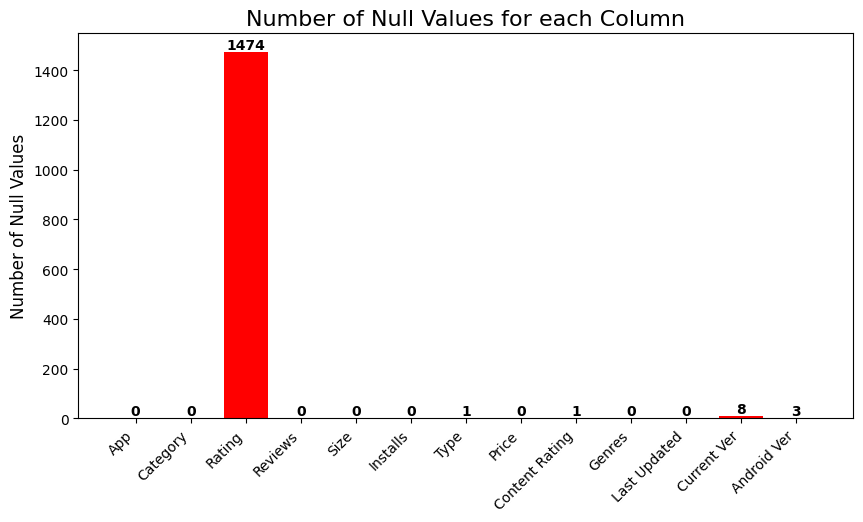

In [ ]:
# Compute missing values per column
missing_values = playstore_df.isnull().sum()

# Create the bar chart

plt.figure(figsize=(10, 5))  # Set figure size
bars= plt.bar(missing_values.index, missing_values.values, color='red')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the plot
plt.ylabel("Number of Null Values", fontsize=12)  # Y-axis label
plt.title("Number of Null Values for each Column", fontsize=16)  # Title

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()

**What did we observe till now about your dataset?**

After **analysing** the dataset and **removing the duplicated value**, we can till now conclude that :

**Duplicate Rows Data**
*   There are total of **10841 rows** and **13 columns** .
*   There are **10358 Non-duplicate rows** and **13 columns** .
*   There are **483 duplicate** rows.

**NULL Values**
*   There are only **five columns with null/missing value**
     and those columns are **Content Rating(1), Type(1), Android Ver(3), Current Ver(8)**. While the **rating column** have maximum no of null value with a **null count of 1474**.

**Data Type Error**
*   The **Last Updated** column must have **date datatype** instead of object type.
*   The columns like **Reviews ,Size , Installs , Price are numerical column** and hence **must be** of either **int or float type** instead of object type


# **2) Understanding our Variables**

###**Variable Description**

1.) **App :** Name of the Application.

2.) **Category :** Category of the various Application.

3.) **Rating* :**Ratings given by the user on scale of 1 to 5 .

4.) **Reviews :** Number of reviews on the App.

5.) **Size :** Size of the Application.

6.) **Installs :** Number of downloads for that Application.

7.) **Type :** Type of App whether free or Paid.

8.) **Price :** Price of the Paid Application.

9.) **Content Rating :** Target audience for that Application.

10) **Last Updated :** Date on which App was last updated.

11.) **current ver :** Current version of Application.

12.) **Android ver :** Required Android Version to run the  Application.

###**Column Description**

In [ ]:
#Finding all the columns of a datafrmae
column_variables = playstore_df.columns
print(list(column_variables))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [ ]:
# Number of unique values in each column of the dataframe

dictt={}
for column in column_variables:
  a = list(playstore_df[column].unique())
  dictt[column] = len(a)

dictt

{'App': 9660,
 'Category': 34,
 'Rating': 41,
 'Reviews': 6002,
 'Size': 462,
 'Installs': 22,
 'Type': 4,
 'Price': 93,
 'Content Rating': 7,
 'Genres': 120,
 'Last Updated': 1378,
 'Current Ver': 2833,
 'Android Ver': 34}

In [ ]:
#List of unique Values in each column of dataframe

unique_values = playstore_df.apply(pd.Series.unique)
print(unique_values)

App               [Photo Editor & Candy Camera & Grid & ScrapBoo...
Category          [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BO...
Rating            [4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, ...
Reviews           [159, 967, 87510, 215644, 167, 178, 36815, 137...
Size              [19M, 14M, 8.7M, 25M, 2.8M, 5.6M, 29M, 33M, 3....
Installs          [10,000+, 500,000+, 5,000,000+, 50,000,000+, 1...
Type                                           [Free, Paid, nan, 0]
Price             [0, $4.99, $3.99, $6.99, $1.49, $2.99, $7.99, ...
Content Rating    [Everyone, Teen, Everyone 10+, Mature 17+, Adu...
Genres            [Art & Design, Art & Design;Pretend Play, Art ...
Last Updated      [January 7, 2018, January 15, 2018, August 1, ...
Current Ver       [1.0.0, 2.0.0, 1.2.4, Varies with device, 1.1,...
Android Ver       [4.0.3 and up, 4.2 and up, 4.4 and up, 2.3 and...
dtype: object


In [ ]:
#App Size description
playstore_df['Size'].unique()


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

**Problem :**

 1.) datatype = object

 2.) values are in M, k & "varies with device"


In [ ]:
#Insatll description
playstore_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

**Problem :**

 1.) datatype = object

 2.)values conatins "+" , ","  & "Free"

In [ ]:
# Price description
playstore_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

**Problem :**

 1.) datatype = object

 2.) value in column have '$' sign.

 3.) One abrupt value as "Everyone"

In [ ]:
playstore_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

**Problem :**

 1.) datatype = object

In [ ]:
playstore_df['Reviews'].loc[playstore_df['Reviews'].str.contains("M")]

,Reviews
10472,3.0M


In [ ]:
# target Audience description
playstore_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
playstore_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

**Problem :**

 1.) one null value

 2.) one of the rating value= 19 , which is greater than 5 and hence a error.

**Statistical Description**

In [ ]:
# Describing dataset
# Gives us a statistical overveiw of all the numerical columns present in our dataset
# Includes count,min,max,mean,median,standard deviation
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
# Datatype for last Updated column
datecolumn= playstore_df['Last Updated'].dtype
print(datecolumn)

object


**Conclusion from Variables**

1.) Need to convert numerical column into int or float type.

2.) Convert the Last Updated column to datetime datatype

3.) To maintain consistency of data for the size, price ,Install and rating column .


#**3) Data Wrangling**

**Dropping Duplicates**

In [ ]:
## Shape of dataframe before removing duplicates
playstore_df.shape

(10841, 13)

In [ ]:
# Dropping the duplicate values in our dataset
# we are keeping the first value within duplicates
# for permanent change we used inplace=True

playstore_df.drop_duplicates(keep ="first", inplace= True)

In [ ]:
# Shape of the dataframe after removing dupliucates
playstore_df.shape

(10358, 13)

**Converting into Date Datatype**

In [ ]:
#Converting the Last Updated column to datetype

playstore_df['Last Updated'] = pd.to_datetime(playstore_df['Last Updated'], errors='coerce')


In [ ]:
# Printing the datatype of Last Updated Column
print(playstore_df['Last Updated'].dtype)

datetime64[ns]


**Removing Ratings above 5**

In [ ]:
playstore_df[playstore_df['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",NaT,4.0 and up,NaN


In [ ]:
# Removing that rating = 19 from the dataset

playstore_df = playstore_df[playstore_df['Rating'] != 19]

In [ ]:
# Cross check whether rating = 19 present or not
playstore_df[playstore_df['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**Converting Reviews into Int type**

In [ ]:
# Converting the reviews column to numerical type

playstore_df['Reviews'] =  playstore_df['Reviews'].astype(int)

In [ ]:
playstore_df['Reviews'].dtype

dtype('int64')

**Removing Disparity from Size column**

In [ ]:
# finding sum of values containing "M"
playstore_df['Size'].loc[playstore_df['Size'].str.contains("M")].value_counts().sum()

np.int64(8516)

In [ ]:
# finding sum of values containing "k"
playstore_df['Size'].loc[playstore_df['Size'].str.contains("k")].value_counts().sum()

np.int64(315)

In [ ]:
# finding sum of values containing "Varies with device"
playstore_df['Size'].loc[playstore_df['Size'].str.contains("Varies with device")].value_counts().sum()

np.int64(1526)

In [ ]:
# Converting Size column into one single unit of Mb
# Defiing the function Size_convert

def Size_convert (size):
    if "k" in size:
      return float(size.replace("k","")) /1024
    elif "M" in size:
      return float(size.replace("M",""))
    elif "Varies with device" in size:
      return np.nan

In [ ]:
# Applying the function Size_convert to the size column of dataframe
playstore_df['Size'] = playstore_df['Size'].apply(Size_convert)


In [ ]:
# Rounding the value upto certain decimal place
playstore_df['Size'] = playstore_df['Size'].round(3)
playstore_df['Size']

,Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8
...,...
10836,53.0
10837,3.6
10838,9.5
10839,NaN


**Removing disparity from Install column**

In [ ]:
playstore_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
# Defining a function to remove plus sign and comma

def Install_Convert(Install):
    if "+" and "," in Install:
      a=Install.replace("," , "")
      b=a.replace("+","")
      return int(b)
    elif "+" in Install:
      return int(Install.replace("+",""))
    else:
      return int(Install)




In [ ]:
#Appli
playstore_df["Installs"] = playstore_df["Installs"].apply(Install_Convert)

In [ ]:
playstore_df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

**Removing Disparity from Price Column**

In [ ]:
playstore_df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
# Defining a function to remove $ sign and converting it into numeric type

def price_convert(price):
  if "$" in price:
    a = price.replace("$","")
    return float(a)
  else:
    return float(price)

In [ ]:
# Applying the defined function onto the price column
playstore_df["Price"] = playstore_df['Price'].apply(price_convert)

In [ ]:
# Rounding up the price column to 2 digits

playstore_df["Price"] = playstore_df["Price"].round(2)
playstore_df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
playstore_df['Price'].dtype

dtype('float64')

In [ ]:
playstore_df.describe(include= "number")

,Rating,Reviews,Size,Installs,Price
count,8892.000000,1.035700e+04,8831.000000,1.035700e+04,10357.000000
mean,4.187877,4.059046e+05,21.287413,1.415776e+07,1.030800
std,0.522377,2.696778e+06,22.540591,8.023955e+07,16.278625
min,1.000000,0.000000e+00,0.008000,0.000000e+00,0.000000
25%,4.000000,3.200000e+01,4.700000,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,29.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


**Missing/ Null values**

In [ ]:
# Finding Null Value count and % of Null Values

null_counts = playstore_df.isnull().sum()
nUll_percent = (null_counts/len(playstore_df))*100

# concatnate columns and rename

null_summary = pd.concat([null_counts, nUll_percent],axis=1)
null_summary.columns=['Null Values Count', '% of Null Value']

In [ ]:
# Sorting the value wrt % of Null Count

null_summary.sort_values(by = '% of Null Value', ascending = False).reset_index()

,index,Null Values Count,% of Null Value
0,Size,1526,14.733996
1,Rating,1465,14.145023
2,Current Ver,8,0.077242
3,Android Ver,2,0.019311
4,Type,1,0.009655
5,Reviews,0,0.000000
6,Category,0,0.000000
7,App,0,0.000000
8,Installs,0,0.000000
9,Content Rating,0,0.000000


In [ ]:
# Null value Imputation with Mode()[0] for Categorical Column
# mode()[0] used to choose the first most frequent value in case of multiple mode values

playstore_df['Current Ver'].fillna(playstore_df['Current Ver'].mode()[0] , inplace = True)
playstore_df['Android Ver'].fillna(playstore_df['Android Ver'].mode()[0], inplace = True)
playstore_df['Type'].fillna(playstore_df['Type'].mode()[0],inplace = True)

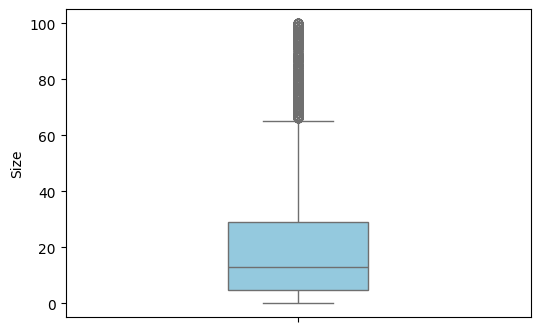

In [ ]:
# plotting box plot to show outliers in size column

# Boxplot to show potential outliers
plt.figure(figsize=(6, 4))
sns.boxplot(y=playstore_df['Size'], color='skyblue', width=0.3)
plt.show()

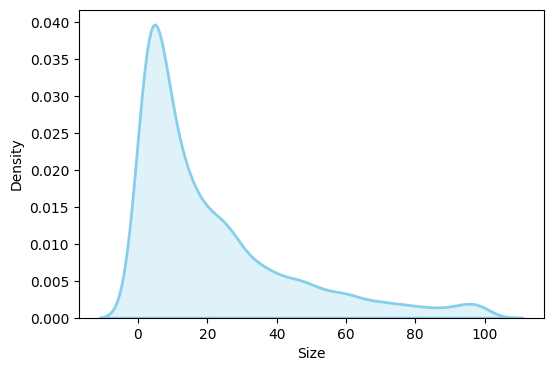

In [ ]:
# Plotting kDE Plot to see the skewnness of my data for size column

plt.figure(figsize=(6, 4))
sns.kdeplot(playstore_df['Size'].dropna(), fill=True, color='skyblue', linewidth=2)
plt.show()

In [ ]:
playstore_df["Size"].describe()

,Size
count,8831.000000
mean,21.287413
std,22.540591
min,0.008000
25%,4.700000
50%,13.000000
75%,29.000000
max,100.000000


**Observation**
The kde plot shows that the data in the size column is skewed to the right hand side. So we will be using Median imputation for our null value.The mean imputation would be sensitive to outliers like size>25.Thats why median imputation would be the best approach.

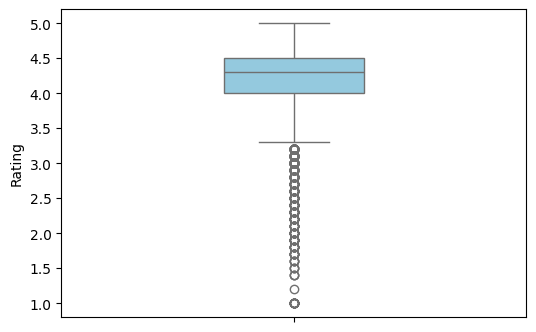

In [ ]:
# plotting box plot to show outliers for Rating Column

# Boxplot to show potential outliers
plt.figure(figsize=(6, 4))
sns.boxplot(y=playstore_df['Rating'], color='skyblue', width=0.3)
plt.show()

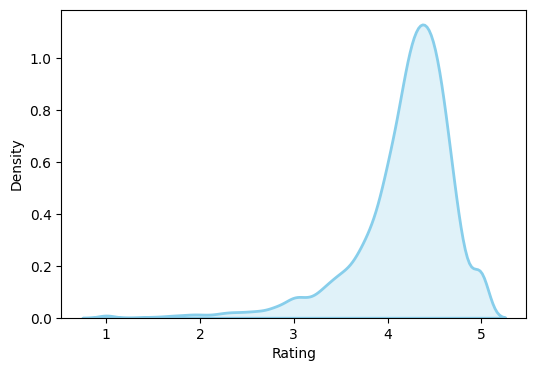

In [ ]:
# Plotting kDE Plot to see the skewnness of my data for Rating column

plt.figure(figsize=(6, 4))
sns.kdeplot(playstore_df['Rating'].dropna(), fill=True, color='skyblue', linewidth=2)
plt.show()

**Observation**
The kde plot shows that the data in the rating column is skewed to the left hand side. So we will be using Median imputation for our null value.The mean imputation would be sensitive to outliers like rating = 1.0 .Thats why median imputation would be the best approach.

In [ ]:
# Median Imputation for Rating  and size column

playstore_df["Rating"].fillna(playstore_df["Rating"].median(),inplace =True)
playstore_df["Size"].fillna(playstore_df["Size"].median(),inplace=True)

In [ ]:
# Cross checkng Null Valiues in dataframe
playstore_df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
# Describing our dataset
playstore_df.describe(include="number")

,Rating,Reviews,Size,Installs,Price
count,10357.000000,1.035700e+04,10357.000000,1.035700e+04,10357.000000
mean,4.203737,4.059046e+05,20.066346,1.415776e+07,1.030800
std,0.485594,2.696778e+06,21.019993,8.023955e+07,16.278625
min,1.000000,0.000000e+00,0.008000,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,5.700000,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,26.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


#**4) Downloading a CSV file**

In [ ]:
#Saving the dataframe in CSV format
playstore_df.to_csv("Play Store.csv")

In [ ]:
# Downloading the CSV file
from google.colab import files
files.download("Play Store.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>